# Supervised Machine Learning: Regression Project


## House Sales In King County, USA Dataset

### Jean Paul Tuyikunde
### May 28, 2021

<h2 style="color:Blue;"><b>Objectives</b></h2>

* Cleaning Data
* Performing Exploratory analysis on data
* Develop prediction models
* Evaluation of developed models

<h2 style="color:Blue;"><b>I. Data Description</b></h2>
<p>This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. Get the data <a href= "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv"> here</a></p>

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

<h2 style="color:Blue;"><b>II. Data Cleaning</b></h2>
Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "ticks")

read the data set in pandas DataFrame

In [2]:
import os

path = ['data']
filename = 'kc_house_data.csv'
filepath = os.sep.join(path + [filename])

data = pd.read_csv(filepath, sep=',')
data.head()

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.shape

(21613, 23)

Dropping the "id","Unnamed: cols" and checking types of every columns

In [4]:
data.drop(['id','Unnamed: 0','Unnamed: 0.1'], axis=1, inplace = True)
data.dtypes.to_frame()

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Let's Check the Missing values in our data

In [6]:
for col in data.columns:
    if data[col].isnull().sum() >0:
        print("The missing value(s) in {} is = {}".format(col, data[col].isnull().sum()))
    else:
        print("No missing values in data")

No missing values in data
No missing values in data
The missing value(s) in bedrooms is = 13
The missing value(s) in bathrooms is = 10
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data
No missing values in data


Replacing the missing values of <code>'bedrooms'&'bathrooms'</code> columns with the mean values using <code>replace()</code> method.

In [7]:
mean1 = data['bedrooms'].mean()
data['bedrooms'].replace(np.nan, mean1, inplace = True)
mean2 = data['bathrooms'].mean()
data['bathrooms'].replace(np.nan, mean2, inplace = True)

In [8]:
for col in data.columns:
    if data[col].isnull().sum() >0:
        print("The missing value(s) in {} is = {}".format(col, data[col].isnull().sum()))
else:
    print("No missing values in data")

No missing values in data


<h2 style="color:Blue;"><b>III. Exploration Data Analysis</b></h2>
Find correlation between some features

In [9]:
features = ['sqft_living','sqft_basement','sqft_lot','price']
data[features].corr()

,sqft_living,sqft_basement,sqft_lot,price
sqft_living,1.000000,0.435043,0.172826,0.702035
sqft_basement,0.435043,1.000000,0.015286,0.323816
sqft_lot,0.172826,0.015286,1.000000,0.089661
price,0.702035,0.323816,0.089661,1.000000


according to the above table we can use the <code>regplot()</code> to see the either if there is a positive or negative correlation between features and <code>*price*</code>

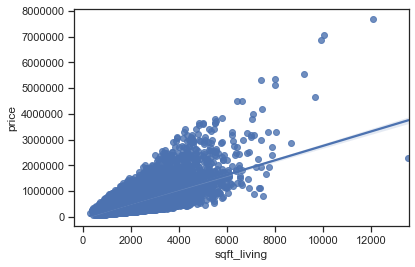

In [10]:
sns.regplot(x = 'sqft_living', y = 'price', data = data)

According to the graph there is more house with Square footage of the home <code>'sqft_living'</code> that ranges from 0 to 8000, and according to the numbers above there is a quite a significant positive relationship, but we can verify again with <code>Pearson correlation</code>

In [11]:
from scipy import stats
pear_coef, p_value = stats.pearsonr(data['sqft_living'], data['price'])
print("The correlation coefficient = {}\nP-value = {}".format(pear_coef, p_value))

The correlation coefficient = 0.7020350546118002
P-value = 0.0


Since the correlation coefficient between *sqft_living* and *price*, **0.7** which is close to 1 but the P-value shows there's a weak **certainty** in the result

In [12]:
data['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


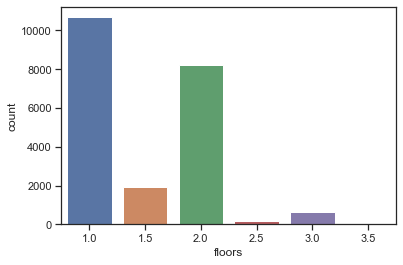

In [13]:
sns.countplot(x=data['floors'])

We can see that there is more houses with 1 floor in our data set

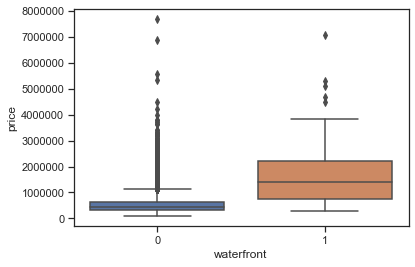

In [14]:
sns.boxplot(x = 'waterfront', y = 'price', data = data)

The above figure was for the relationship between waterfront and price, and the distributions of price to different waterfront do not *overlap* and for that waterfront would be a good predictor of <code>price</code>.

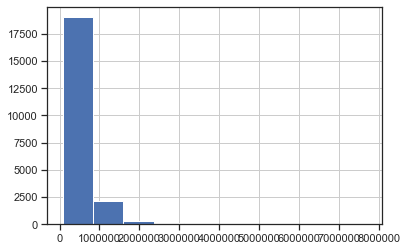

In [15]:
data['price'].hist()

The above figure shows that the price is not normally distributed but the next cell show how you can transform the *Price* with <code> boxcox</code>Transformation which is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

(array([  31.,   95.,  540., 2908., 5831., 7012., 3918., 1017.,  240.,
          21.]),
 array([3.96421089, 3.98465477, 4.00509864, 4.02554252, 4.04598639,
        4.06643027, 4.08687414, 4.10731802, 4.12776189, 4.14820576,
        4.16864964]),
 <a list of 10 Patch objects>)

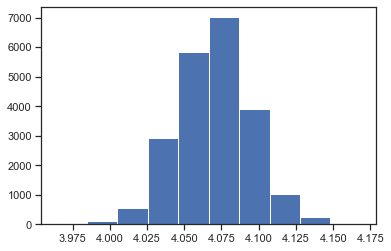

In [16]:
from scipy.stats import boxcox

bc_results = boxcox(data.price)[0]
plt.hist(bc_results)

<h2 style="color:Blue;"><b>IV. Model Development</b></h2>
For our models we will be using the following list of features and libraries

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)


features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  

In [18]:
y_col = 'price'
#Separating data
X = data.drop(y_col, axis=1)
Y = data[y_col]

x_train,x_test,y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
print("x_train shape :{}\nx_test shape: {}".format(x_train.shape, x_test.shape))

x_train shape :(15129, 19)
x_test shape: (6484, 19)


All model will be fitted through Pipeline and calculate the **R^2** score and **MSE** (mean squared error).

#### Linear Regression model

In [19]:
lr = LinearRegression()
st = StandardScaler()
pr = PolynomialFeatures(degree= 2, include_bias=True)

Input = [('scale',st),('polynomial',pr), ('model',lr)]
pipe = Pipeline(Input)
pipe.fit(x_train[features], y_train)
lr_prediction = pipe.predict(x_test[features])

In [20]:
#Taking the R^2 score
print("The Linear Regression R^2 score=",pipe.score(x_test[features], y_test))
print("The MSE for Linear Regression =",mean_squared_error(y_test, lr_prediction))

The Linear Regression R^2 score= 0.7114426981295834
The MSE for Linear Regression = 41658016837.75108


#### Ridge Regression model

In [21]:
#with Ridge regression and rest will be the same
RR = Ridge(alpha = 0.1)
Input1 = [('scale',st),('polynomial',pr), ('model',RR)]

pipe1 = Pipeline(Input1)
pipe1.fit(x_train[features], y_train)
Rg_prediction = pipe1.predict(x_test[features])

In [22]:
#R^2 score
print("Ridge R^2 score=", pipe1.score(x_test[features], y_test))
print("The MSE for Ridge Regression =",mean_squared_error(y_test, Rg_prediction))

Ridge R^2 score= 0.7117768928182427
The MSE for Ridge Regression = 41609770309.67151


#### Lasso Regression model

In [23]:
#with Ridge regression and rest will be the same
Lass = Lasso(alpha = 0.1)
Input2 = [('scale',st),('polynomial',pr), ('model',Lass)]

pipe2 = Pipeline(Input2)
pipe2.fit(x_train[features], y_train)
Lass_prediction = pipe2.predict(x_test[features])
#This takes a little while

C:\Users\User\Anaconda3\envs\tensoflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74139943876732.03, tolerance: 197654197140.59027
  positive)


In [24]:
#R^2 score
print("Lasso R^2 score=", pipe2.score(x_test[features], y_test))
print("The MSE for Lasso Regression =",mean_squared_error(y_test, Lass_prediction))

Lasso R^2 score= 0.7117767757461126
The MSE for Lasso Regression = 41609787210.96887


### Insights

What would be the best model?
The best model should have the low <code>MSE</code> and High<code>R^2 score</code>

<h4>Let's take a look at the values for the different models.</h4>
<p>Linear Regression: Using features highlighted as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.7114426981295834</li>
    <li>MSE: 41658016837.75108</li>
</ul>
</p>

<p>Ridge Regression: Using features as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.7117768928182427</li>
    <li>MSE: 41609770309.67151</li>
</ul>
</p>

<p>Lasso Regression: Using features as Predictor Variable of Price.
<ul>
    <li>R-squared: 0.7117767757461126</li>
    <li>MSE: 41609787210.96887</li>
</ul>
</p>

* R^2 of Ridge is greater than the R^2 of Linear model
* R^2 of Ridge is greater than the R^2 of Lasso
* R^2 of lasso is greater than the R^2 of Linear

* Mse_ridge is less to linear
* Mse_ridge is less to lasso

We can keep refining our models by using *GridSearch* to find the **best hyperparameters**

In [25]:
X_train1 = x_train[features]
X_test1 = x_test[features]

RR2 = Ridge() # constructor of ridge
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000], 'normalize':[True, False]}]
Grid = GridSearchCV(RR2, parameters, cv = 4) #using 4 folds
Grid.fit(X_train1, y_train)
Grid.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

Let's use the results of the above model, and change the alpha from 0.1 to 0.001

In [26]:
# Ridge regression with best estimator
RR = Ridge(alpha = 0.001, normalize = True)
Input3 = [('scale',st),('polynomial',pr), ('model',RR)]

pipe = Pipeline(Input3)
pipe.fit(X_train1, y_train)
ridge_pred = pipe.predict(X_test1)
#R^2 score and MSE
print("Ridge R^2 score=", pipe.score(X_test1, y_test))
print("The MSE for Ridge Regression =",mean_squared_error(y_test, ridge_pred))

Ridge R^2 score= 0.7117982405688242
The MSE for Ridge Regression = 41606688408.962685


By using the Grid search results which is<code>GridSearch.best_estimator_</code> to our second Ridge model the <code>R^2</code> score was *increased* and The **MSE** was **decreased**.

<h2 style="color:Blue;"><b>V. Conclusions</b></h2>

* The data quality is good since there was less amount of missing data
* The best model to be employed could be Ridge and Lasso
* Further addition of features can be made
* Data analysis can be improved by exploring different `approaches`,`models` and `hyperparameters`